### Day-1

In [29]:
import warnings
warnings.filterwarnings('ignore')
from sys import argv
import matplotlib.pyplot as plt
import seaborn as sns; sns.set(style='ticks',color_codes=True)
import numpy as np
import pandas as pd
import scipy.stats as stats
import random
from scipy.stats import ttest_1samp,wilcoxon,shapiro,ttest_ind,mannwhitneyu,levene,bartlett
from statsmodels.stats.power import ttest_power
import matplotlib.pyplot as plt
%matplotlib inline
from scipy.stats import chisquare,chi2_contingency
from statsmodels.stats.proportion import proportions_ztest
from scipy.stats import chisquare,chi2_contingency,f_oneway
import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.formula.api import ols
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.model_selection import train_test_split
import statsmodels.tsa.api as smt
from statsmodels.graphics.gofplots import ProbPlot
import pylab
from statsmodels.compat import lzip
import statsmodels.stats.api as sms
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.feature_selection import RFE
from sklearn.linear_model import RidgeCV, LassoCV, Ridge, Lasso
from mlxtend.feature_selection import SequentialFeatureSelector as sfs
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import itertools
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from mlxtend.classifier import EnsembleVoteClassifier
from mlxtend.data import iris_data
from mlxtend.plotting import plot_decision_regions
import plotly.express as px
import plotly.graph_objects as go
import plotly.figure_factory as ff
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix,auc,roc_auc_score
from sklearn.metrics import recall_score,precision_score,accuracy_score,f1_score,classification_report
from sklearn.preprocessing import StandardScaler
from sklearn import preprocessing
from sklearn.cluster import KMeans
from scipy.stats import zscore
from mpl_toolkits.mplot3d import Axes3D
from sklearn.cluster import AgglomerativeClustering 

In [2]:
data=pd.read_csv('abalone.csv',header=None,names = ['Sex','Length','Diameter',
                                                    'Height','Whole_weight','Shucked_weight',
                                                    'Viscera_weight','Shell_weight','Rings'])
data.head()

,Sex,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


In [3]:
data['Sex'].value_counts()

M    1528
I    1342
F    1307
Name: Sex, dtype: int64

In [4]:
data.shape

(4177, 9)

In [5]:
data1=data.loc[:,'Length':'Rings']
data1.head()

,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,Rings
0,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


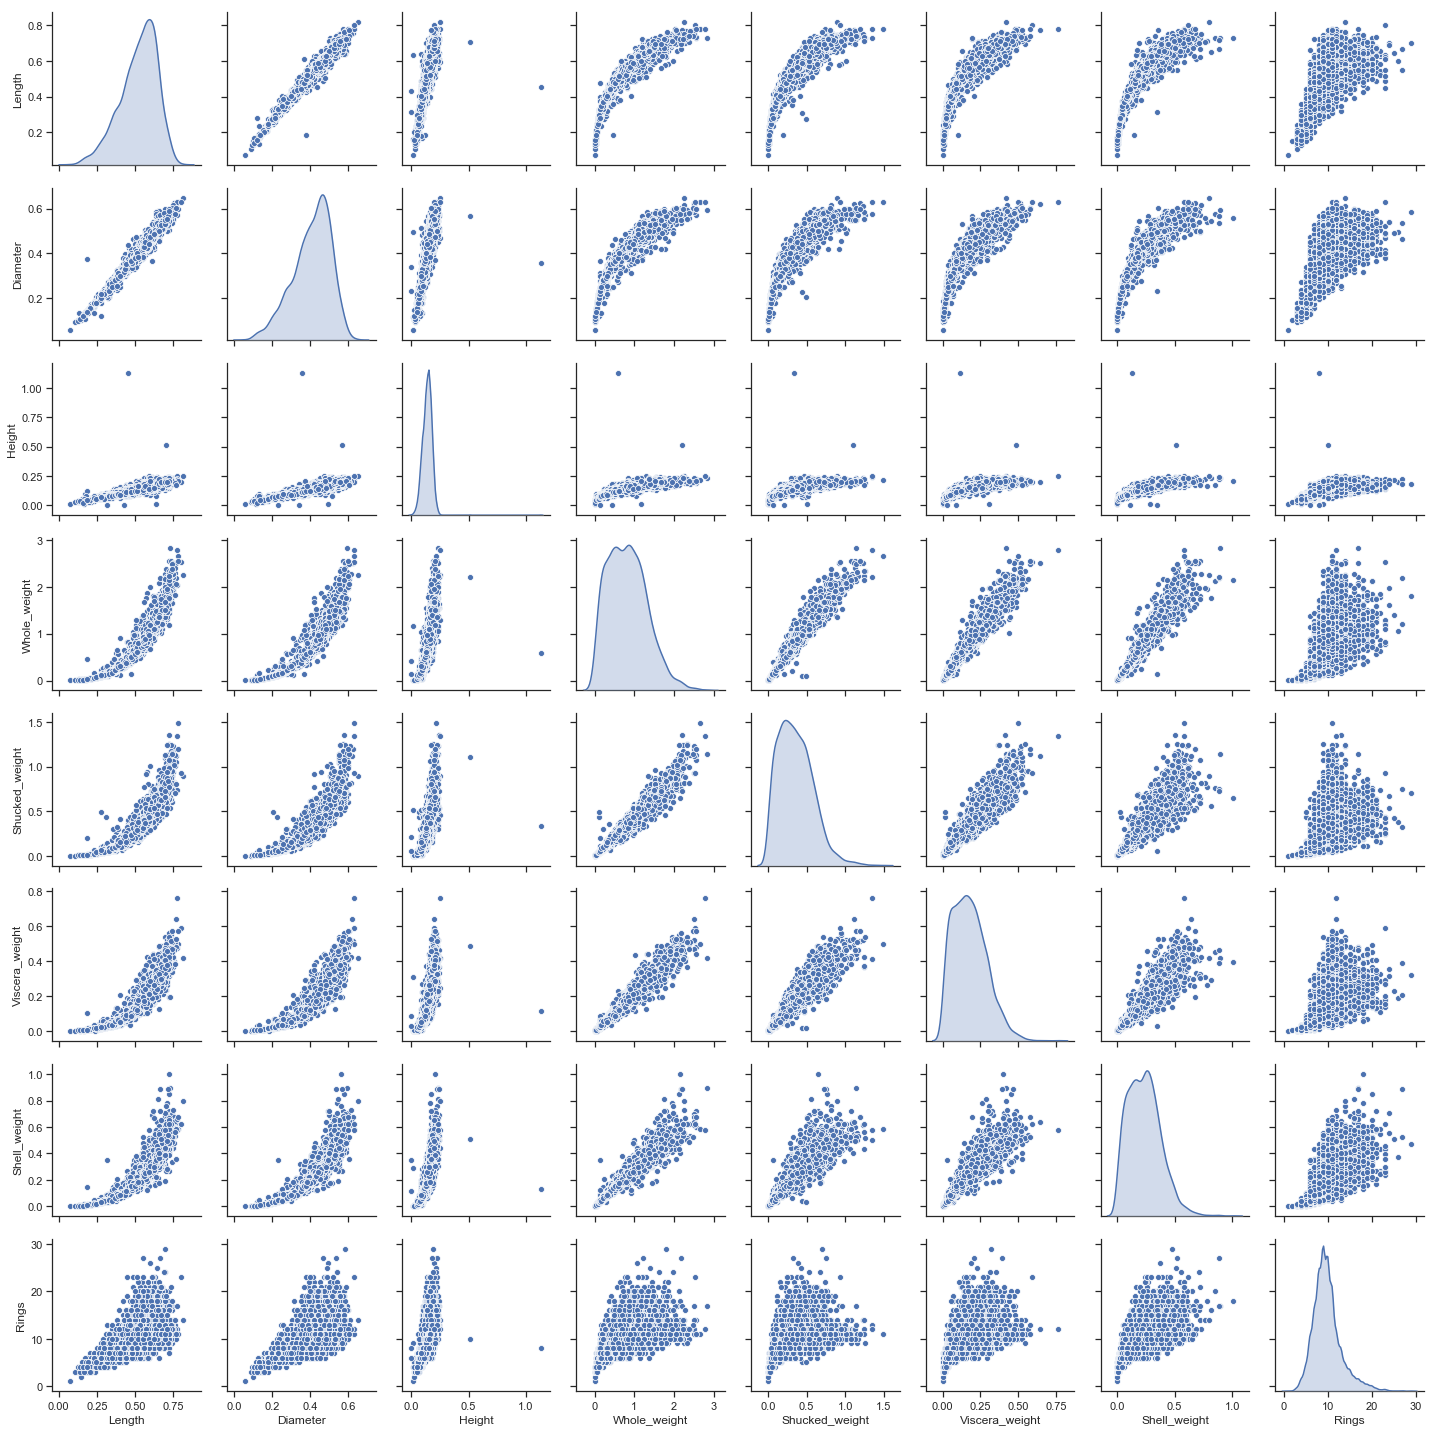

In [6]:
sns.pairplot(data1,diag_kind='kde')

In [7]:
dataz=data1.apply(zscore)
dataz.head()

,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,Rings
0,-0.574558,-0.432149,-1.064424,-0.641898,-0.607685,-0.726212,-0.638217,1.571544
1,-1.448986,-1.439929,-1.183978,-1.230277,-1.170910,-1.205221,-1.212987,-0.910013
2,0.050033,0.122130,-0.107991,-0.309469,-0.463500,-0.356690,-0.207139,-0.289624
3,-0.699476,-0.432149,-0.347099,-0.637819,-0.648238,-0.607600,-0.602294,0.020571
4,-1.615544,-1.540707,-1.423087,-1.272086,-1.215968,-1.287337,-1.320757,-0.910013


In [8]:
cluster_range=range(1,15)
cluster_error=[]
for num_cluster in cluster_range:
    model=KMeans(num_cluster)
    model.fit(dataz)
    cluster_error.append(model.inertia_)


In [9]:
labels=model.labels_
centroids=model.cluster_centers_

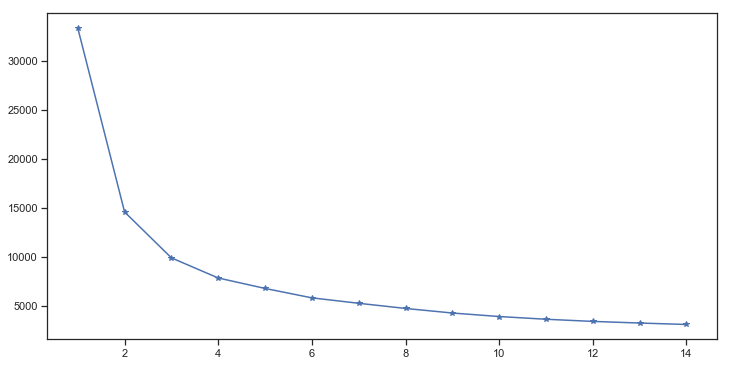

In [10]:
plt.figure(figsize=(12,6))
plt.plot(cluster_range,cluster_error,marker='*')

In [11]:
kmeans=KMeans(n_clusters=3,n_init=15,random_state=2)

In [12]:
kmeans.fit(dataz)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=15, n_jobs=None, precompute_distances='auto',
       random_state=2, tol=0.0001, verbose=0)

In [13]:
centroids=kmeans.cluster_centers_
centroids

array([[ 0.13570472,  0.13223651,  0.06955548, -0.08492905, -0.09047204,
        -0.0829803 , -0.06004439,  0.14255146],
       [-1.27709975, -1.27787282, -1.12085776, -1.13750326, -1.08408354,
        -1.11591049, -1.1283335 , -0.85717476],
       [ 1.03608988,  1.04187408,  0.98130211,  1.22176997,  1.17823769,
         1.19808871,  1.17676949,  0.62065252]])

In [14]:
type(centroids)

numpy.ndarray

In [15]:
centroids_data=pd.DataFrame(centroids,columns=list(dataz))

In [16]:
centroids_data

,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,Rings
0,0.135705,0.132237,0.069555,-0.084929,-0.090472,-0.082980,-0.060044,0.142551
1,-1.277100,-1.277873,-1.120858,-1.137503,-1.084084,-1.115910,-1.128333,-0.857175
2,1.036090,1.041874,0.981302,1.221770,1.178238,1.198089,1.176769,0.620653


In [17]:
kmeans.labels_[:30]

array([0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1,
       0, 0, 2, 0, 0, 0, 0, 0])

In [18]:
dataz['Class']=kmeans.labels_

In [19]:
dataz.head()

,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,Rings,Class
0,-0.574558,-0.432149,-1.064424,-0.641898,-0.607685,-0.726212,-0.638217,1.571544,0
1,-1.448986,-1.439929,-1.183978,-1.230277,-1.170910,-1.205221,-1.212987,-0.910013,1
2,0.050033,0.122130,-0.107991,-0.309469,-0.463500,-0.356690,-0.207139,-0.289624,0
3,-0.699476,-0.432149,-0.347099,-0.637819,-0.648238,-0.607600,-0.602294,0.020571,0
4,-1.615544,-1.540707,-1.423087,-1.272086,-1.215968,-1.287337,-1.320757,-0.910013,1


In [20]:
data1['class']=kmeans.labels_

In [21]:
data1.head()

,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,Rings,class
0,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15,0
1,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7,1
2,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9,0
3,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10,0
4,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7,1


In [22]:
g0=data1[data1['class']==0]
g1=data1[data1['class']==1]
g2=data1[data1['class']==2]

In [23]:
g0.describe()

,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,Rings,class
count,1773.000000,1773.000000,1773.000000,1773.000000,1773.000000,1773.000000,1773.000000,1773.000000,1773.0
mean,0.540206,0.420936,0.142408,0.786761,0.339128,0.171398,0.230399,10.393683,0.0
std,0.045025,0.037322,0.017829,0.183744,0.096088,0.044877,0.056098,2.725725,0.0
min,0.405000,0.310000,0.015000,0.352500,0.113500,0.056500,0.099500,6.000000,0.0
25%,0.505000,0.390000,0.130000,0.631500,0.263500,0.137000,0.185000,9.000000,0.0
50%,0.540000,0.425000,0.140000,0.793000,0.332500,0.169000,0.230000,10.000000,0.0
75%,0.575000,0.450000,0.155000,0.931500,0.407000,0.204000,0.270000,11.000000,0.0
max,0.655000,0.525000,0.235000,1.256500,0.707000,0.311000,0.480000,23.000000,0.0


In [24]:
g1.describe()

,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,Rings,class
count,1180.00000,1180.000000,1180.000000,1180.000000,1180.000000,1180.000000,1180.000000,1180.000000,1180.0
mean,0.37064,0.281081,0.092640,0.270990,0.118770,0.058289,0.081783,7.170339,1.0
std,0.07813,0.063377,0.022409,0.137169,0.066725,0.030415,0.041280,1.890730,0.0
min,0.07500,0.055000,0.000000,0.002000,0.001000,0.000500,0.001500,1.000000,1.0
25%,0.32500,0.243750,0.080000,0.165875,0.067500,0.034500,0.050000,6.000000,1.0
50%,0.38500,0.290000,0.095000,0.268750,0.114250,0.057500,0.081000,7.000000,1.0
75%,0.43500,0.330000,0.110000,0.382250,0.165125,0.082000,0.114625,8.000000,1.0
max,0.50000,0.435000,0.160000,0.647500,0.495000,0.159000,0.350500,16.000000,1.0


In [25]:
g2.describe()

,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,Rings,class
count,1224.000000,1224.000000,1224.000000,1224.000000,1224.000000,1224.000000,1224.000000,1224.000000,1224.0
mean,0.648346,0.511213,0.180519,1.427255,0.620633,0.311823,0.402448,11.931373,2.0
std,0.043314,0.035939,0.034846,0.304738,0.160611,0.073666,0.096283,3.100950,0.0
min,0.455000,0.355000,0.125000,0.594000,0.300000,0.116000,0.133500,6.000000,2.0
25%,0.620000,0.485000,0.165000,1.205000,0.511500,0.259500,0.335000,10.000000,2.0
50%,0.645000,0.505000,0.175000,1.347500,0.592000,0.299250,0.384000,11.000000,2.0
75%,0.675000,0.530000,0.190000,1.578875,0.691000,0.352500,0.450000,13.000000,2.0
max,0.815000,0.650000,1.130000,2.825500,1.488000,0.760000,1.005000,29.000000,2.0


In [26]:
dataz['class']=kmeans.labels_

In [27]:
dataz.head()

,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,Rings,Class,class
0,-0.574558,-0.432149,-1.064424,-0.641898,-0.607685,-0.726212,-0.638217,1.571544,0,0
1,-1.448986,-1.439929,-1.183978,-1.230277,-1.170910,-1.205221,-1.212987,-0.910013,1,1
2,0.050033,0.122130,-0.107991,-0.309469,-0.463500,-0.356690,-0.207139,-0.289624,0,0
3,-0.699476,-0.432149,-0.347099,-0.637819,-0.648238,-0.607600,-0.602294,0.020571,0,0
4,-1.615544,-1.540707,-1.423087,-1.272086,-1.215968,-1.287337,-1.320757,-0.910013,1,1


In [28]:
g0=dataz[dataz['class']==0]
g1=dataz[dataz['class']==1]
g2=dataz[dataz['class']==2]

In [29]:
g0.describe()

,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,Rings,Class,class
count,1773.000000,1773.000000,1773.000000,1773.000000,1773.000000,1773.000000,1773.000000,1773.000000,1773.0,1773.0
mean,0.135026,0.131566,0.069149,-0.085617,-0.091194,-0.083904,-0.060582,0.142689,0.0,0.0
std,0.374966,0.376122,0.426304,0.374736,0.432955,0.409458,0.403042,0.845505,0.0,0.0
min,-0.990952,-0.986428,-2.977291,-0.971268,-1.107829,-1.132229,-1.001041,-1.220208,0.0,0.0
25%,-0.158164,-0.180204,-0.227545,-0.402264,-0.431959,-0.397748,-0.386755,-0.289624,0.0,0.0
50%,0.133312,0.172519,0.011563,-0.072894,-0.121059,-0.105780,-0.063446,0.020571,0.0,0.0
75%,0.424788,0.424464,0.370226,0.209569,0.214622,0.213560,0.223939,0.330765,0.0,0.0
max,1.091018,1.180300,2.283092,0.872387,1.566361,1.189827,1.732711,4.053100,0.0,0.0


### Day-2

In [30]:
df=pd.read_csv('iris.csv',header=None, names=['sepal_length','sepal_width','petal_length','petal_width','class'])
df.head()

,sepal_length,sepal_width,petal_length,petal_width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [31]:
df['class'].value_counts()

Iris-versicolor    50
Iris-virginica     50
Iris-setosa        50
Name: class, dtype: int64

In [32]:
df.iloc[0:50]

,sepal_length,sepal_width,petal_length,petal_width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
5,5.4,3.9,1.7,0.4,Iris-setosa
6,4.6,3.4,1.4,0.3,Iris-setosa
7,5.0,3.4,1.5,0.2,Iris-setosa
8,4.4,2.9,1.4,0.2,Iris-setosa
9,4.9,3.1,1.5,0.1,Iris-setosa


In [33]:
df.loc[51:99]

,sepal_length,sepal_width,petal_length,petal_width,class
51,6.4,3.2,4.5,1.5,Iris-versicolor
52,6.9,3.1,4.9,1.5,Iris-versicolor
53,5.5,2.3,4.0,1.3,Iris-versicolor
54,6.5,2.8,4.6,1.5,Iris-versicolor
55,5.7,2.8,4.5,1.3,Iris-versicolor
56,6.3,3.3,4.7,1.6,Iris-versicolor
57,4.9,2.4,3.3,1.0,Iris-versicolor
58,6.6,2.9,4.6,1.3,Iris-versicolor
59,5.2,2.7,3.9,1.4,Iris-versicolor
60,5.0,2.0,3.5,1.0,Iris-versicolor


In [34]:
df.loc[100:]

,sepal_length,sepal_width,petal_length,petal_width,class
100,6.3,3.3,6.0,2.5,Iris-virginica
101,5.8,2.7,5.1,1.9,Iris-virginica
102,7.1,3.0,5.9,2.1,Iris-virginica
103,6.3,2.9,5.6,1.8,Iris-virginica
104,6.5,3.0,5.8,2.2,Iris-virginica
105,7.6,3.0,6.6,2.1,Iris-virginica
106,4.9,2.5,4.5,1.7,Iris-virginica
107,7.3,2.9,6.3,1.8,Iris-virginica
108,6.7,2.5,5.8,1.8,Iris-virginica
109,7.2,3.6,6.1,2.5,Iris-virginica


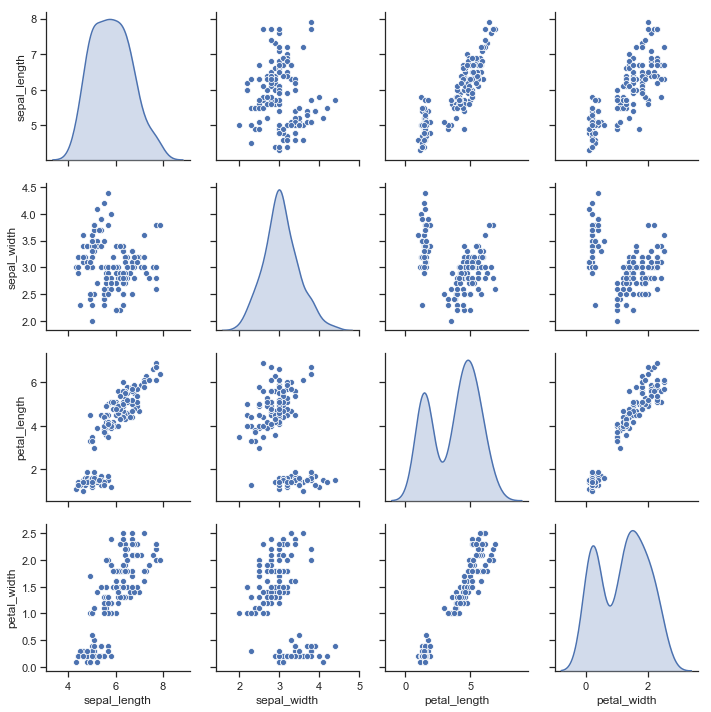

In [35]:
sns.pairplot(df,diag_kind='kde')

In [36]:
df.columns

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'class'], dtype='object')

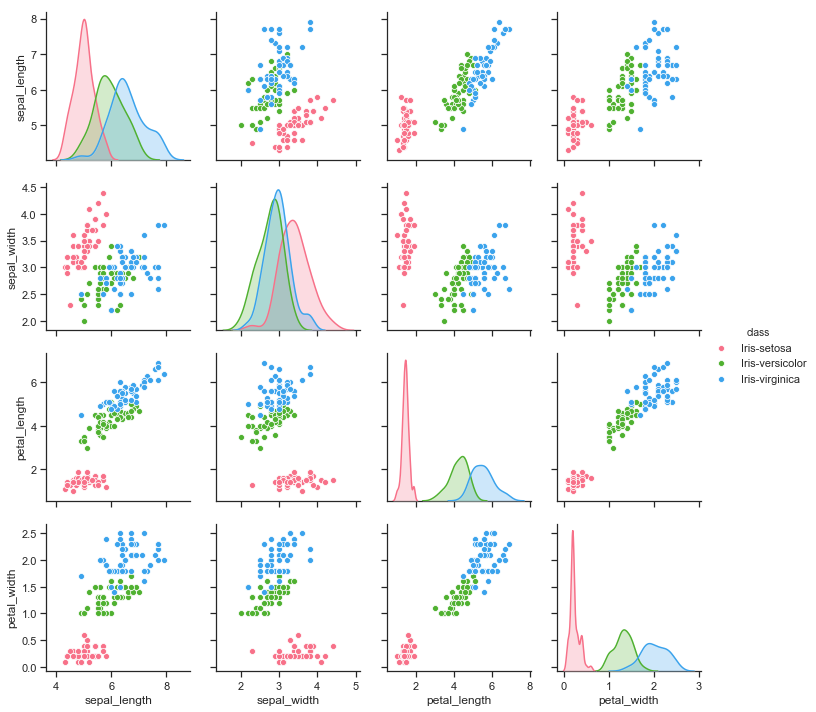

In [37]:
i=sns.pairplot(df,vars=['sepal_length', 'sepal_width', 'petal_length', 'petal_width'], hue='class',palette='husl')

In [38]:
g0=df[df['class']=='Iris-setosa']
g1=df[df['class']=='Iris-versicolor']
g2=df[df['class']=='Iris-virginica']

In [39]:
g0.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,50.00000,50.000000,50.000000,50.00000
mean,5.00600,3.418000,1.464000,0.24400
std,0.35249,0.381024,0.173511,0.10721
min,4.30000,2.300000,1.000000,0.10000
25%,4.80000,3.125000,1.400000,0.20000
50%,5.00000,3.400000,1.500000,0.20000
75%,5.20000,3.675000,1.575000,0.30000
max,5.80000,4.400000,1.900000,0.60000


In [40]:
g1.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,50.000000,50.000000,50.000000,50.000000
mean,5.936000,2.770000,4.260000,1.326000
std,0.516171,0.313798,0.469911,0.197753
min,4.900000,2.000000,3.000000,1.000000
25%,5.600000,2.525000,4.000000,1.200000
50%,5.900000,2.800000,4.350000,1.300000
75%,6.300000,3.000000,4.600000,1.500000
max,7.000000,3.400000,5.100000,1.800000


In [41]:
g2.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,50.00000,50.000000,50.000000,50.00000
mean,6.58800,2.974000,5.552000,2.02600
std,0.63588,0.322497,0.551895,0.27465
min,4.90000,2.200000,4.500000,1.40000
25%,6.22500,2.800000,5.100000,1.80000
50%,6.50000,3.000000,5.550000,2.00000
75%,6.90000,3.175000,5.875000,2.30000
max,7.90000,3.800000,6.900000,2.50000


#### As per the above information sepal and petal length  of virginica is lager and setosa is small

In [42]:
df1=df.loc[:,'sepal_length':'petal_width']
df1.head()

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [43]:
dfz=df1.apply(zscore)
dfz.head()

,sepal_length,sepal_width,petal_length,petal_width
0,-0.900681,1.032057,-1.341272,-1.312977
1,-1.143017,-0.124958,-1.341272,-1.312977
2,-1.385353,0.337848,-1.398138,-1.312977
3,-1.506521,0.106445,-1.284407,-1.312977
4,-1.021849,1.263460,-1.341272,-1.312977


In [44]:
cluster_range=range(1,15)
cluster_error=[]
for num_cluster in cluster_range:
    model=KMeans(num_cluster)
    model.fit(dfz)
    cluster_error.append(model.inertia_)

In [45]:
labels=model.labels_
centroids=model.cluster_centers_

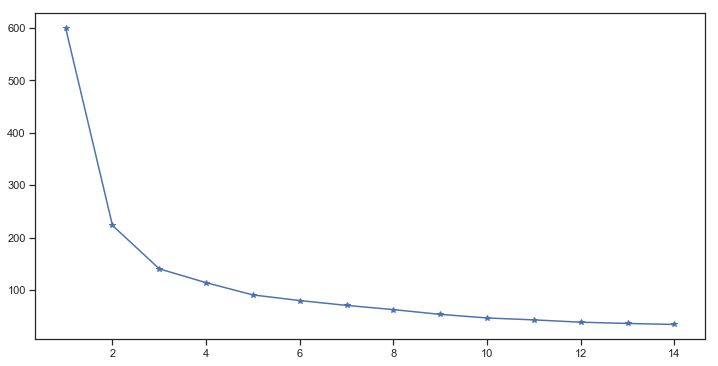

In [46]:
plt.figure(figsize=(12,6))
plt.plot(cluster_range,cluster_error,marker='*')

In [47]:
kmeans=KMeans(n_clusters=3,n_init=15,random_state=2)

In [48]:
kmeans.fit(dfz)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=15, n_jobs=None, precompute_distances='auto',
       random_state=2, tol=0.0001, verbose=0)

In [49]:
centroids=kmeans.cluster_centers_
centroids

array([[ 1.13597027,  0.09659843,  0.996271  ,  1.01717187],
       [-1.01457897,  0.84230679, -1.30487835, -1.25512862],
       [-0.05021989, -0.88029181,  0.34753171,  0.28206327]])

In [50]:
centroids_df=pd.DataFrame(centroids,columns=list(dfz))

In [51]:
centroids_df

,sepal_length,sepal_width,petal_length,petal_width
0,1.135970,0.096598,0.996271,1.017172
1,-1.014579,0.842307,-1.304878,-1.255129
2,-0.050220,-0.880292,0.347532,0.282063


#### As per the above clester class0 is the virginica which has high length and width and class 1 is setosa which has low length and width and class 2 is versicolor.

In [52]:
dfz['class']=kmeans.labels_
dfz.head()

,sepal_length,sepal_width,petal_length,petal_width,class
0,-0.900681,1.032057,-1.341272,-1.312977,1
1,-1.143017,-0.124958,-1.341272,-1.312977,1
2,-1.385353,0.337848,-1.398138,-1.312977,1
3,-1.506521,0.106445,-1.284407,-1.312977,1
4,-1.021849,1.263460,-1.341272,-1.312977,1


In [53]:
dfz['class'].value_counts()

2    53
1    50
0    47
Name: class, dtype: int64

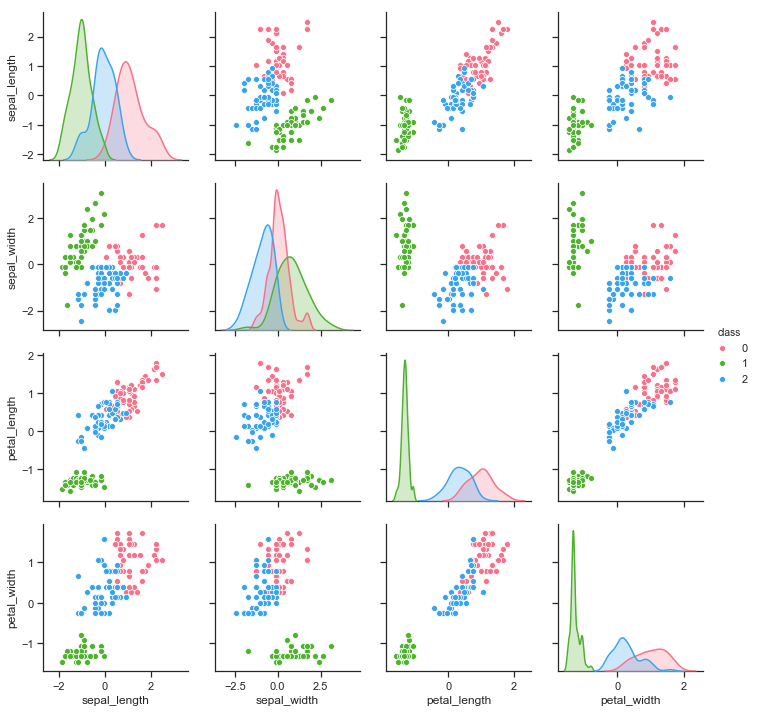

In [54]:
i=sns.pairplot(dfz,vars=['sepal_length', 'sepal_width', 'petal_length', 'petal_width'], hue='class',palette='husl')

In [55]:
from mpl_toolkits.mplot3d import Axes3D

Text(0.5, 0.92, '3D plot of kmeans Clustering')

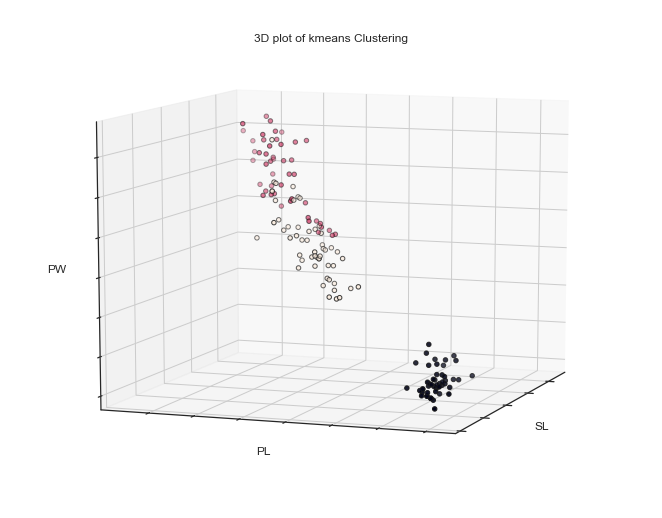

In [56]:
fig=plt.figure(figsize=(9,7))
ax=Axes3D(fig,rect=[0,0,1,1],elev=10,azim=200)
kmeans.fit(dfz)
labels=kmeans.labels_
ax.scatter(dfz.iloc[:,0],dfz.iloc[:,2],dfz.iloc[:,3],
          c=labels.astype(np.float),edgecolor='K')
ax.w_xaxis.set_ticklabels([])
ax.w_yaxis.set_ticklabels([])
ax.w_zaxis.set_ticklabels([])
ax.set_xlabel('SL')
ax.set_ylabel('PL')
ax.set_zlabel('PW')
ax.set_title('3D plot of kmeans Clustering')

In [57]:
''''fig=plt.figure(figsize=(9,7))
ax=Axes3D(fig,rect=[0,0,1,1],elev=10,azim=200)
kmeans.fit(df1)
labels=kmeans.labels_
ax.scatter(df1.iloc[:,0],df1.iloc[:,2],df1.iloc[:,3],
          c=labels.astype(np.float),edgecolor='K')
ax.w_xaxis.set_ticklabels([])
ax.w_yaxis.set_ticklabels([])
ax.w_zaxis.set_ticklabels([])
ax.set_xlabel('SL')
ax.set_ylabel('PL')
ax.set_zlabel('PW')
ax.set_title('3D plot of kmeans Clustering')'''

"'fig=plt.figure(figsize=(9,7))\nax=Axes3D(fig,rect=[0,0,1,1],elev=10,azim=200)\nkmeans.fit(df1)\nlabels=kmeans.labels_\nax.scatter(df1.iloc[:,0],df1.iloc[:,2],df1.iloc[:,3],\n          c=labels.astype(np.float),edgecolor='K')\nax.w_xaxis.set_ticklabels([])\nax.w_yaxis.set_ticklabels([])\nax.w_zaxis.set_ticklabels([])\nax.set_xlabel('SL')\nax.set_ylabel('PL')\nax.set_zlabel('PW')\nax.set_title('3D plot of kmeans Clustering')"

In [58]:
kmeans.inertia_

140.96581663074699

In [59]:
'''cluster_range=range(1,15)
cluster_error=[]
for num_cluster in cluster_range:
    model=KMeans(num_cluster,init=15,random_state=2)
    model.fit(dfz)
    cluster_error.append(model.inertia_)'''

'cluster_range=range(1,15)\ncluster_error=[]\nfor num_cluster in cluster_range:\n    model=KMeans(num_cluster,init=15,random_state=2)\n    model.fit(dfz)\n    cluster_error.append(model.inertia_)'

In [60]:
dfz.head()

,sepal_length,sepal_width,petal_length,petal_width,class
0,-0.900681,1.032057,-1.341272,-1.312977,1
1,-1.143017,-0.124958,-1.341272,-1.312977,1
2,-1.385353,0.337848,-1.398138,-1.312977,1
3,-1.506521,0.106445,-1.284407,-1.312977,1
4,-1.021849,1.263460,-1.341272,-1.312977,1


In [61]:
c0=centroids[0,:]
c0

array([1.13597027, 0.09659843, 0.996271  , 1.01717187])

In [62]:
c1=centroids[1,:]
c1

array([-1.01457897,  0.84230679, -1.30487835, -1.25512862])

In [63]:
c2=centroids[2,:]
c2

array([-0.05021989, -0.88029181,  0.34753171,  0.28206327])

In [64]:
g0=dfz[dfz['class']==0]
g0.head()

,sepal_length,sepal_width,petal_length,petal_width,class
50,1.401508,0.337848,0.535296,0.264699,0
51,0.674501,0.337848,0.421564,0.396172,0
52,1.280340,0.106445,0.649027,0.396172,0
56,0.553333,0.569251,0.535296,0.527645,0
65,1.038005,0.106445,0.364699,0.264699,0


In [65]:
df_clusters=dfz.groupby(['class'])
df0=df_clusters.get_group(0)
df1=df_clusters.get_group(1)
df2=df_clusters.get_group(2)

In [66]:
c2.shape

(4,)

In [67]:
c0=kmeans.cluster_centers_[0,:]
c1=kmeans.cluster_centers_[1,:]
c2=kmeans.cluster_centers_[2,:]

In [68]:
print(c0)

[-1.01457897  0.84230679 -1.30487835 -1.25512862  1.        ]


In [69]:
I0=0
I1=0
I2=0
for i in np.arange(df0.shape[0]):
    I0=I0+np.sum((df0.iloc[i,:-1]-c0)**2)
for i in np.arange(df0.shape[1]):
    I1=I1+np.sum((df1.iloc[i,:-1]-c1)**2)
for i in np.arange(df2.shape[0]):
    I2=I2+np.sum((df2.iloc[i,:-1]-c2)**2)

ValueError: operands could not be broadcast together with shapes (4,) (5,) 

In [70]:
from sklearn.cluster import AgglomerativeClustering

In [71]:
dfz.head()

,sepal_length,sepal_width,petal_length,petal_width,class
0,-0.900681,1.032057,-1.341272,-1.312977,1
1,-1.143017,-0.124958,-1.341272,-1.312977,1
2,-1.385353,0.337848,-1.398138,-1.312977,1
3,-1.506521,0.106445,-1.284407,-1.312977,1
4,-1.021849,1.263460,-1.341272,-1.312977,1


In [72]:
dfz1=dfz.loc[:,'sepal_length':'petal_width']
dfz1.head()

,sepal_length,sepal_width,petal_length,petal_width
0,-0.900681,1.032057,-1.341272,-1.312977
1,-1.143017,-0.124958,-1.341272,-1.312977
2,-1.385353,0.337848,-1.398138,-1.312977
3,-1.506521,0.106445,-1.284407,-1.312977
4,-1.021849,1.263460,-1.341272,-1.312977


In [73]:
model12=AgglomerativeClustering(n_clusters=3,affinity='euclidean', linkage='complete')

In [74]:
model12.fit(dfz1)

AgglomerativeClustering(affinity='euclidean', compute_full_tree='auto',
                        connectivity=None, distance_threshold=None,
                        linkage='complete', memory=None, n_clusters=3,
                        pooling_func='deprecated')

In [75]:
l=pd.DataFrame(model12.labels_)
l[0].value_counts()

0    77
1    49
2    24
Name: 0, dtype: int64

In [76]:
model12=AgglomerativeClustering(n_clusters=3,affinity='euclidean', linkage='single')

In [77]:
model12.fit(dfz1)

AgglomerativeClustering(affinity='euclidean', compute_full_tree='auto',
                        connectivity=None, distance_threshold=None,
                        linkage='single', memory=None, n_clusters=3,
                        pooling_func='deprecated')

In [78]:
l=pd.DataFrame(model12.labels_)
l[0].value_counts()

0    100
1     49
2      1
Name: 0, dtype: int64

In [79]:
model12=AgglomerativeClustering(n_clusters=3,affinity='euclidean', linkage='ward')

In [80]:
model12.fit(dfz1)

AgglomerativeClustering(affinity='euclidean', compute_full_tree='auto',
                        connectivity=None, distance_threshold=None,
                        linkage='ward', memory=None, n_clusters=3,
                        pooling_func='deprecated')

In [81]:
l=pd.DataFrame(model12.labels_)
l[0].value_counts()

0    71
1    49
2    30
Name: 0, dtype: int64

In [ ]:
model12=AgglomerativeClustering(n_clusters=3,affinity='euclidean', linkage='average')

In [ ]:
model12.fit(dfz)

In [82]:
l=pd.DataFrame(model12.labels_)
l[0].value_counts()

0    71
1    49
2    30
Name: 0, dtype: int64

Text(0.5, 0.92, '3D plot of kmeans Clustering')

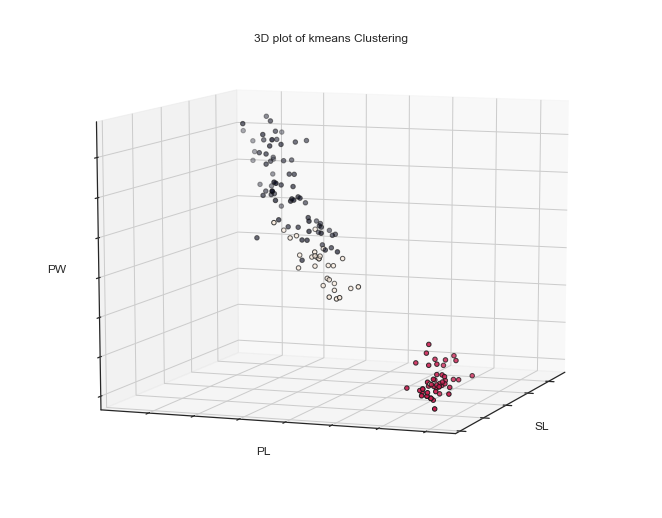

In [83]:
fig=plt.figure(figsize=(9,7))
ax=Axes3D(fig,rect=[0,0,1,1],elev=10,azim=200)
kmeans.fit(dfz1)
labels=model12.labels_
ax.scatter(dfz1.iloc[:,0],dfz1.iloc[:,2],dfz1.iloc[:,3],
          c=labels.astype(np.float),edgecolor='K')
ax.w_xaxis.set_ticklabels([])
ax.w_yaxis.set_ticklabels([])
ax.w_zaxis.set_ticklabels([])
ax.set_xlabel('SL')
ax.set_ylabel('PL')
ax.set_zlabel('PW')
ax.set_title('3D plot of kmeans Clustering')

In [84]:
dfz1.head()

,sepal_length,sepal_width,petal_length,petal_width
0,-0.900681,1.032057,-1.341272,-1.312977
1,-1.143017,-0.124958,-1.341272,-1.312977
2,-1.385353,0.337848,-1.398138,-1.312977
3,-1.506521,0.106445,-1.284407,-1.312977
4,-1.021849,1.263460,-1.341272,-1.312977


In [85]:
dfz1['class']=model12.labels_
dfz1.head()

,sepal_length,sepal_width,petal_length,petal_width,class
0,-0.900681,1.032057,-1.341272,-1.312977,1
1,-1.143017,-0.124958,-1.341272,-1.312977,1
2,-1.385353,0.337848,-1.398138,-1.312977,1
3,-1.506521,0.106445,-1.284407,-1.312977,1
4,-1.021849,1.263460,-1.341272,-1.312977,1


In [86]:
agc_cleusters=dfz1.groupby(['class'])
df0=agc_cleusters.get_group(0)
df1=agc_cleusters.get_group(1)
df2=agc_cleusters.get_group(2)
df0.shape,df1.shape,df2.shape

((71, 5), (49, 5), (30, 5))

In [87]:
c0=np.array([df0['sepal_length'].mean(),df0['sepal_width'].mean(),df0['petal_length'].mean(),df0['petal_width'].mean()])
c1=np.array([df1['sepal_length'].mean(),df1['sepal_width'].mean(),df1['petal_length'].mean(),df1['petal_width'].mean()])
c2=np.array([df2['sepal_length'].mean(),df2['sepal_width'].mean(),df2['petal_length'].mean(),df2['petal_width'].mean()])

In [88]:
c0

array([ 0.85198648, -0.14125358,  0.85806877,  0.86280834])

In [89]:
c1

array([-1.00206653,  0.89510445, -1.30297509, -1.25663117])

In [90]:
c2

array([-0.37965933, -1.12770378,  0.09742991,  0.01051784])

In [91]:
agc_I0=0
agc_I1=0
agc_I2=0
for i in np.arange(df0.shape[0]):
    agc_I0=agc_I0+np.sum((df0.iloc[i,:-1]-c0)**2)
for i in np.arange(df1.shape[1]):
    agc_I1=agc_I1+np.sum((df1.iloc[i,:-1]-c1)**2)
for i in np.arange(df2.shape[0]):
    agc_I2=agc_I2+np.sum((df2.iloc[i,:-1]-c2)**2)

In [92]:
agc_I0

82.66545030423667

In [93]:
agc_I1

2.589080511812072

In [94]:
agc_I2

26.20293661721983

In [95]:
agc_I0+agc_I1+agc_I2

111.45746743326858

In [97]:
from scipy.cluster.hierarchy import dendrogram,linkage

In [98]:
dfz1.head()

,sepal_length,sepal_width,petal_length,petal_width,class
0,-0.900681,1.032057,-1.341272,-1.312977,1
1,-1.143017,-0.124958,-1.341272,-1.312977,1
2,-1.385353,0.337848,-1.398138,-1.312977,1
3,-1.506521,0.106445,-1.284407,-1.312977,1
4,-1.021849,1.263460,-1.341272,-1.312977,1


In [99]:
den=dfz1.loc[:,'sepal_length':'petal_width']
den.head()

,sepal_length,sepal_width,petal_length,petal_width
0,-0.900681,1.032057,-1.341272,-1.312977
1,-1.143017,-0.124958,-1.341272,-1.312977
2,-1.385353,0.337848,-1.398138,-1.312977
3,-1.506521,0.106445,-1.284407,-1.312977
4,-1.021849,1.263460,-1.341272,-1.312977


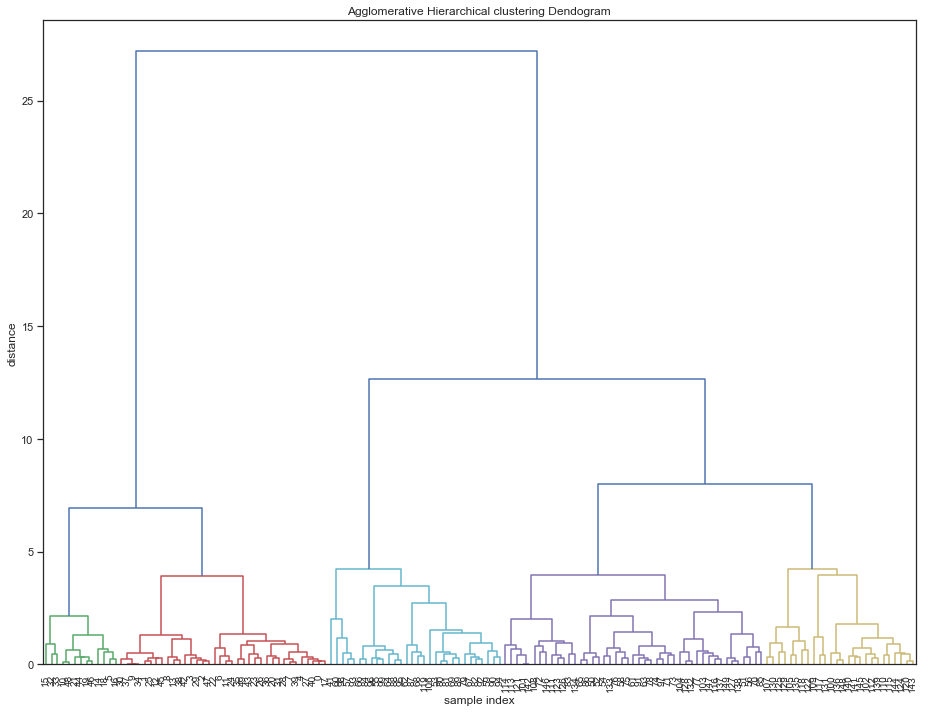

In [130]:
plt.figure(figsize=(13,10))
plt.title('Agglomerative Hierarchical clustering Dendogram')
plt.xlabel('sample index')
plt.ylabel('distance')
z=linkage(den,'ward')
dendrogram(z,leaf_rotation=90.0,color_threshold=5,leaf_font_size=10 ,truncate_mode='level')
plt.tight_layout()

### Grains.csv

In [131]:
grain=pd.read_csv('Grains.csv')

In [132]:
grain.head()

,A,P,C,LK,WK,A_Coef,LKG,target
0,15.26,14.84,0.8710,5.763,3.312,2.221,5.220,0
1,14.88,14.57,0.8811,5.554,3.333,1.018,4.956,0
2,14.29,14.09,0.9050,5.291,3.337,2.699,4.825,0
3,13.84,13.94,0.8955,5.324,3.379,2.259,4.805,0
4,16.14,14.99,0.9034,5.658,3.562,1.355,5.175,0


In [133]:
grain['target'].value_counts()

2    70
1    70
0    70
Name: target, dtype: int64

In [134]:
grain.columns

Index(['A', 'P', 'C', 'LK', 'WK', 'A_Coef', 'LKG', 'target'], dtype='object')

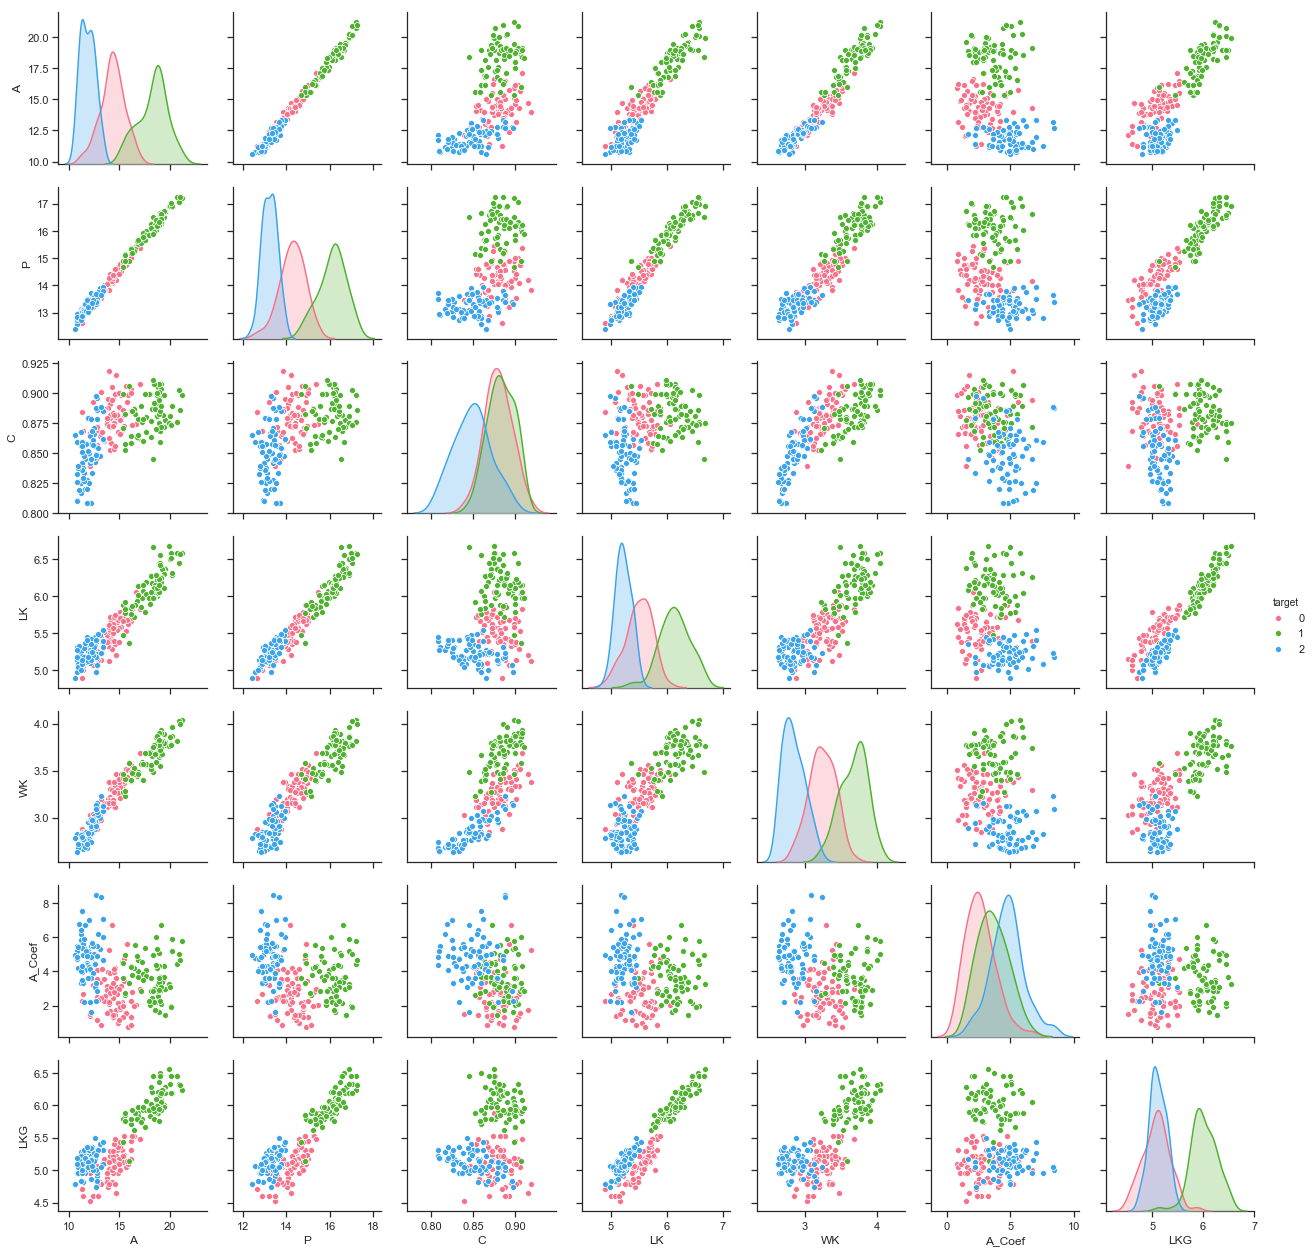

In [135]:
i=sns.pairplot(grain,vars=['A', 'P', 'C', 'LK', 'WK', 'A_Coef', 'LKG'], hue= 'target',palette='husl')

In [136]:
gra=grain.loc[:,'A':'LKG']
gra.head()

,A,P,C,LK,WK,A_Coef,LKG
0,15.26,14.84,0.8710,5.763,3.312,2.221,5.220
1,14.88,14.57,0.8811,5.554,3.333,1.018,4.956
2,14.29,14.09,0.9050,5.291,3.337,2.699,4.825
3,13.84,13.94,0.8955,5.324,3.379,2.259,4.805
4,16.14,14.99,0.9034,5.658,3.562,1.355,5.175


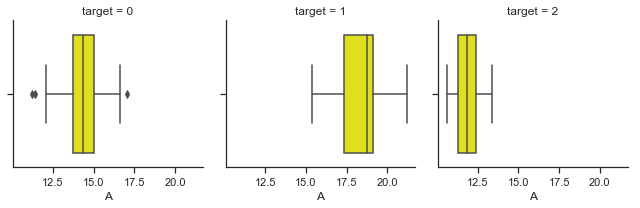

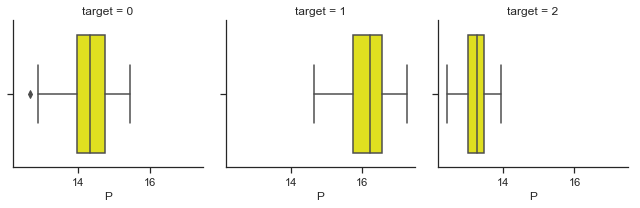

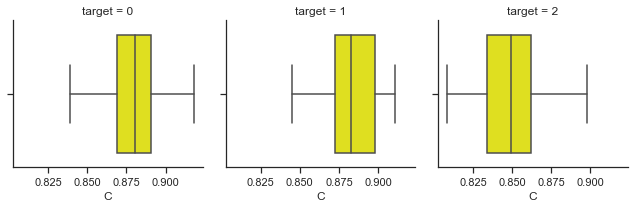

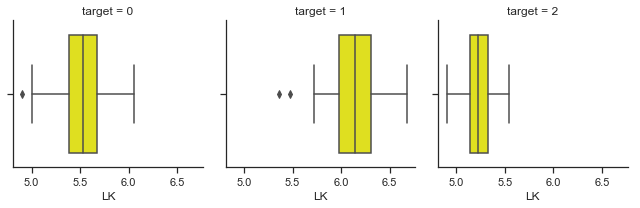

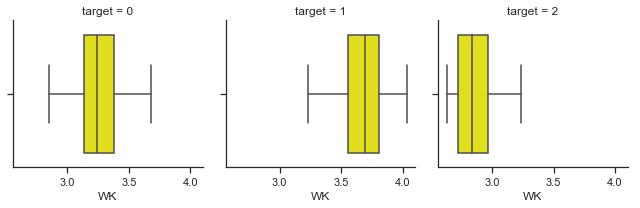

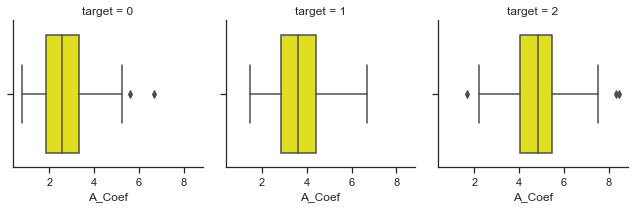

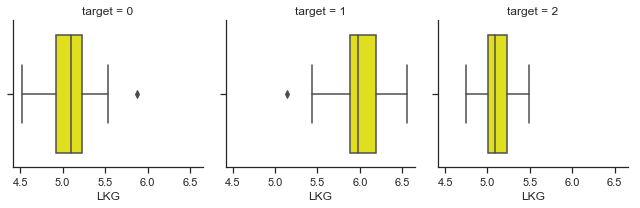

In [140]:
a = sns.FacetGrid(grain, col = 'target')
a.map(sns.boxplot, 'A', color = 'yellow', order = ['0','1','2'])

p = sns.FacetGrid(grain, col = 'target')
p.map(sns.boxplot, 'P', color = 'yellow', order = ['0','1','2'])

c = sns.FacetGrid(grain, col = 'target')
c.map(sns.boxplot, 'C', color = 'yellow', order = ['0','1','2'])

LK = sns.FacetGrid(grain, col = 'target')
LK.map(sns.boxplot, 'LK', color = 'yellow', order = ['0','1','2'])

WK = sns.FacetGrid(grain, col = 'target')
WK.map(sns.boxplot, 'WK', color = 'yellow', order = ['0','1','2'])

A_Coef = sns.FacetGrid(grain, col = 'target')
A_Coef.map(sns.boxplot, 'A_Coef', color = 'yellow', order = ['0','1','2'])

LKG = sns.FacetGrid(grain, col = 'target')
LKG.map(sns.boxplot, 'LKG', color = 'yellow', order = ['0','1','2'])

In [141]:
graz = gra.apply(zscore)

In [143]:
graz.head()

,A,P,C,LK,WK,A_Coef,LKG
0,0.142098,0.215462,0.000061,0.304218,0.141702,-0.986152,-0.383577
1,0.011188,0.008224,0.428515,-0.168625,0.197432,-1.788166,-0.922013
2,-0.192067,-0.360201,1.442383,-0.763637,0.208048,-0.667479,-1.189192
3,-0.347091,-0.475333,1.039381,-0.688978,0.319508,-0.960818,-1.229983
4,0.445257,0.330595,1.374509,0.066666,0.805159,-1.563495,-0.475356


In [144]:
cluster_range = range(1,15)
cluster_errors = []
for num_cluster in cluster_range:
    model = KMeans(num_cluster)
    model.fit(graz)
    cluster_errors.append(model.inertia_)

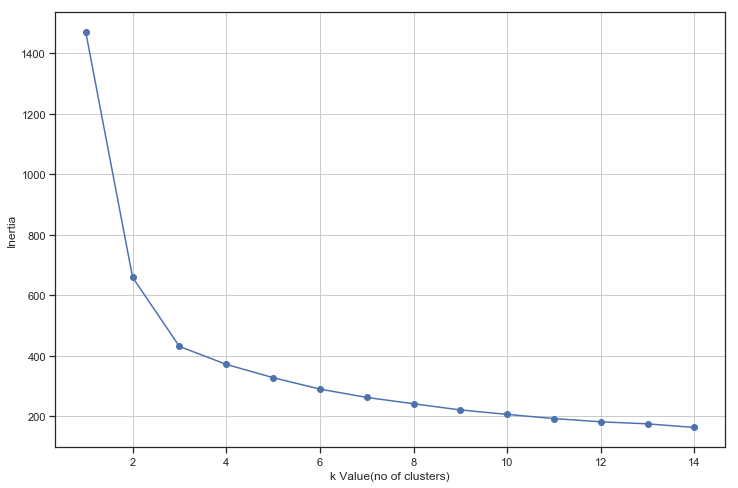

In [145]:
# ELBOW PLOT
plt.figure(figsize = (12,8))
plt.plot(np.arange(1,15), cluster_errors, 'o-')
plt.xlabel('k Value(no of clusters)')
plt.ylabel('Inertia')
plt.grid()
plt.show()

In [146]:
pd.DataFrame({'k':np.arange(1,15),'inertia':cluster_errors})

,k,inertia
0,1,1470.000000
1,2,659.171754
2,3,430.658973
3,4,371.301721
4,5,327.447262
5,6,289.573638
6,7,262.071306
7,8,241.018064
8,9,220.709527
9,10,205.902434


In [147]:
kmeans = KMeans(n_clusters=3, n_init=15, random_state=2)

In [148]:
kmeans.fit(graz)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=15, n_jobs=None, precompute_distances='auto',
       random_state=2, tol=0.0001, verbose=0)

In [149]:
# Looking at three different centroids
centroids = kmeans.cluster_centers_
centroids

array([[ 1.25668163,  1.26196622,  0.56046437,  1.23788278,  1.16485187,
        -0.04521936,  1.29230787],
       [-1.03025257, -1.00664879, -0.9649051 , -0.89768501, -1.08558344,
         0.69480448, -0.62480856],
       [-0.14111949, -0.17004259,  0.4496064 , -0.25781445,  0.00164694,
        -0.66191867, -0.58589311]])

In [151]:
centroid_df = pd.DataFrame(centroids,columns = list(graz) )
centroid_df

,A,P,C,LK,WK,A_Coef,LKG
0,1.256682,1.261966,0.560464,1.237883,1.164852,-0.045219,1.292308
1,-1.030253,-1.006649,-0.964905,-0.897685,-1.085583,0.694804,-0.624809
2,-0.141119,-0.170043,0.449606,-0.257814,0.001647,-0.661919,-0.585893


### from the centroids we can surely tell 2nd cluster is for infants

In [152]:
kmeans.inertia_ #total inertia

430.65897315130053

In [153]:
kmeans.labels_

array([2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 2, 1, 2, 2,
       2, 2, 2, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0,
       2, 0, 0, 2, 0, 2, 2, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2,
       1, 2, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1])

In [155]:
graz['Class'] = kmeans.labels_

In [156]:
graz.head()

,A,P,C,LK,WK,A_Coef,LKG,Class
0,0.142098,0.215462,0.000061,0.304218,0.141702,-0.986152,-0.383577,2
1,0.011188,0.008224,0.428515,-0.168625,0.197432,-1.788166,-0.922013,2
2,-0.192067,-0.360201,1.442383,-0.763637,0.208048,-0.667479,-1.189192,2
3,-0.347091,-0.475333,1.039381,-0.688978,0.319508,-0.960818,-1.229983,2
4,0.445257,0.330595,1.374509,0.066666,0.805159,-1.563495,-0.475356,2


In [157]:
gra['Class'] = kmeans.labels_

In [158]:
gra.head()

,A,P,C,LK,WK,A_Coef,LKG,Class
0,15.26,14.84,0.8710,5.763,3.312,2.221,5.220,2
1,14.88,14.57,0.8811,5.554,3.333,1.018,4.956,2
2,14.29,14.09,0.9050,5.291,3.337,2.699,4.825,2
3,13.84,13.94,0.8955,5.324,3.379,2.259,4.805,2
4,16.14,14.99,0.9034,5.658,3.562,1.355,5.175,2


In [160]:
graz['Class'].value_counts()

1    72
2    71
0    67
Name: Class, dtype: int64

In [162]:
g = graz.groupby('Class')
g0 = g.get_group(0)
g1 = g.get_group(1)
g2 = g.get_group(2)

In [164]:
g0.describe()

,A,P,C,LK,WK,A_Coef,LKG,Class
count,67.000000,67.000000,67.000000,67.000000,67.000000,67.000000,67.000000,67.0
mean,1.256682,1.261966,0.560464,1.237883,1.164852,-0.045219,1.292308,0.0
std,0.439968,0.419420,0.632804,0.538016,0.440572,0.807383,0.468207,0.0
min,0.245448,0.253840,-1.094408,0.202410,0.340739,-1.485494,0.154859,0.0
25%,0.944781,0.994526,0.154898,0.866426,0.811794,-0.568144,0.960473,0.0
50%,1.344400,1.282358,0.504874,1.186557,1.221810,-0.054135,1.225612,0.0
75%,1.480478,1.551001,1.147556,1.582478,1.458001,0.480541,1.599866,0.0
max,2.181534,2.065260,1.688427,2.367533,2.055112,1.987902,2.328998,0.0


In [165]:
g1.describe()

,A,P,C,LK,WK,A_Coef,LKG,Class
count,72.000000,72.000000,72.000000,72.000000,72.000000,72.000000,72.000000,72.0
mean,-1.030253,-1.006649,-0.964905,-0.897685,-1.085583,0.694804,-0.624809,1.0
std,0.246248,0.272640,0.846411,0.320797,0.368057,0.903157,0.375298,0.0
min,-1.466714,-1.649686,-2.668236,-1.650501,-1.668209,-1.465494,-1.813288,1.0
25%,-1.237622,-1.202587,-1.527105,-1.106958,-1.380269,0.221370,-0.830235,1.0
50%,-1.041257,-1.004943,-0.950175,-0.912956,-1.120194,0.732546,-0.650756,1.0
75%,-0.844893,-0.826488,-0.404002,-0.659001,-0.773869,1.175721,-0.376439,1.0
max,-0.519341,-0.467658,0.733948,-0.198036,-0.070604,3.170590,0.169135,1.0


In [166]:
g2.describe()

,A,P,C,LK,WK,A_Coef,LKG,Class
count,71.000000,71.000000,71.000000,71.000000,71.000000,71.000000,71.000000,71.0
mean,-0.141119,-0.170043,0.449606,-0.257814,0.001647,-0.661919,-0.585893,2.0
std,0.363968,0.403506,0.657618,0.509644,0.410723,0.784308,0.549772,0.0
min,-0.953410,-1.081698,-0.776248,-1.458196,-0.856138,-1.956769,-1.637889,2.0
25%,-0.353981,-0.406254,0.012787,-0.562283,-0.274949,-1.166155,-0.916915,2.0
50%,-0.143837,-0.129935,0.462452,-0.198036,-0.001605,-0.706813,-0.563056,2.0
75%,0.142098,0.154058,0.948176,0.137931,0.316855,-0.245472,-0.294858,2.0
max,0.548607,0.545509,2.006586,0.659416,0.858236,1.989902,0.960473,2.0


Text(0.5, 0.92, '3D plot of kmeans Clustering')

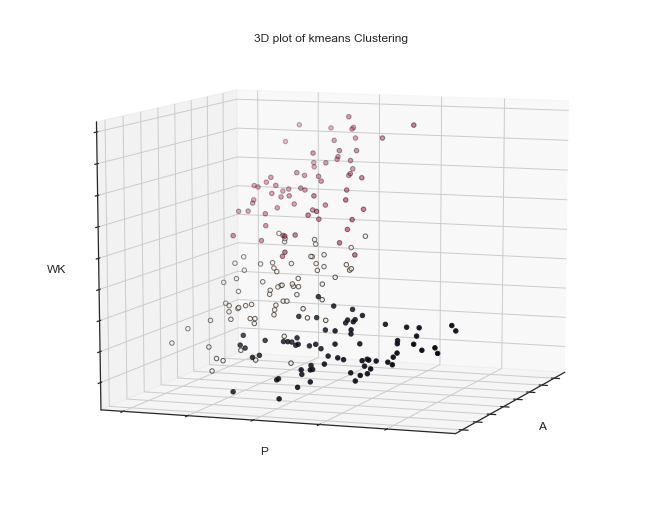

In [169]:
fig=plt.figure(figsize=(9,7))
ax=Axes3D(fig,rect=[0,0,1,1],elev=10,azim=200)
kmeans.fit(graz)
labels=kmeans.labels_
ax.scatter(graz.iloc[:,0],graz.iloc[:,2],graz.iloc[:,3],
          c=labels.astype(np.float),edgecolor='K')
ax.w_xaxis.set_ticklabels([])
ax.w_yaxis.set_ticklabels([])
ax.w_zaxis.set_ticklabels([])
ax.set_xlabel('A')
ax.set_ylabel('P')
ax.set_zlabel('WK')
ax.set_title('3D plot of kmeans Clustering')

### Hiererchial Clustering :
### Agglomerative Clustering :

In [171]:
graz.head()

,A,P,C,LK,WK,A_Coef,LKG,Class
0,0.142098,0.215462,0.000061,0.304218,0.141702,-0.986152,-0.383577,2
1,0.011188,0.008224,0.428515,-0.168625,0.197432,-1.788166,-0.922013,2
2,-0.192067,-0.360201,1.442383,-0.763637,0.208048,-0.667479,-1.189192,2
3,-0.347091,-0.475333,1.039381,-0.688978,0.319508,-0.960818,-1.229983,2
4,0.445257,0.330595,1.374509,0.066666,0.805159,-1.563495,-0.475356,2


In [188]:
gra1=graz.loc[:,'A':'LKG']
gra1.head()

,A,P,C,LK,WK,A_Coef,LKG
0,0.142098,0.215462,0.000061,0.304218,0.141702,-0.986152,-0.383577
1,0.011188,0.008224,0.428515,-0.168625,0.197432,-1.788166,-0.922013
2,-0.192067,-0.360201,1.442383,-0.763637,0.208048,-0.667479,-1.189192
3,-0.347091,-0.475333,1.039381,-0.688978,0.319508,-0.960818,-1.229983
4,0.445257,0.330595,1.374509,0.066666,0.805159,-1.563495,-0.475356


In [189]:
modelg = AgglomerativeClustering(n_clusters = 3, affinity = 'euclidean',linkage = 'ward')

In [190]:
modelg.fit(gra1)

AgglomerativeClustering(affinity='euclidean', compute_full_tree='auto',
                        connectivity=None, distance_threshold=None,
                        linkage='ward', memory=None, n_clusters=3,
                        pooling_func='deprecated')

In [191]:
L = pd.DataFrame(modelg.labels_)
L[0].value_counts()

0    73
1    70
2    67
Name: 0, dtype: int64

In [192]:
modelg.labels_

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 0, 0, 1, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 0, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2], dtype=int64)

In [195]:
gra1['Class'] = modelg.labels_ # adding labels got from agglomerative clustering

In [196]:
gra1.head()

,A,P,C,LK,WK,A_Coef,LKG,Class
0,0.142098,0.215462,0.000061,0.304218,0.141702,-0.986152,-0.383577,0
1,0.011188,0.008224,0.428515,-0.168625,0.197432,-1.788166,-0.922013,0
2,-0.192067,-0.360201,1.442383,-0.763637,0.208048,-0.667479,-1.189192,0
3,-0.347091,-0.475333,1.039381,-0.688978,0.319508,-0.960818,-1.229983,0
4,0.445257,0.330595,1.374509,0.066666,0.805159,-1.563495,-0.475356,0


In [197]:
# Creating different groups for different class label
g = gra1.groupby('Class')
g0 = g.get_group(0)
g1 = g.get_group(1)
g2 = g.get_group(2)

In [187]:
g0.shape,g1.shape,g2.shape

((73, 8), (70, 8), (67, 8))

In [199]:
# Calculating the centroids which will be the mean of each group
c0 = g0.iloc[:,:-1].mean().values
c1 = g1.iloc[:,:-1].mean().values
c2 = g2.iloc[:,:-1].mean().values

In [200]:
c0

array([-0.22340186, -0.25000973,  0.34750811, -0.34004066, -0.08532778,
       -0.72535983, -0.65651131])

In [184]:
c1

array([ 1.21398281,  1.21744501,  0.56850541,  1.19825643,  1.13059428,
       -0.04069661,  1.24268596])

In [185]:
c2

array([-1.02493226, -0.99955881, -0.97258911, -0.88141764, -1.08824882,
        0.83283627, -0.58302525])

In [201]:
agc_I0=0
agc_I1=0
agc_I2=0
for i in np.arange(g0.shape[0]):
    agc_I0=agc_I0+np.sum((g0.iloc[i,:-1]-c0)**2)
for i in np.arange(g1.shape[1]):
    agc_I1=agc_I1+np.sum((g1.iloc[i,:-1]-c1)**2)
for i in np.arange(g2.shape[0]):
    agc_I2=agc_I2+np.sum((g2.iloc[i,:-1]-c2)**2)

In [202]:
agc_I0+agc_I1+agc_I2

311.6620049362212

### Day-3

In [3]:
data=pd.read_csv('abalone.csv',header=None,names = ['Sex','Length','Diameter',
                                                    'Height','Whole_weight','Shucked_weight',
                                                    'Viscera_weight','Shell_weight','Rings'])
data.head()

,Sex,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


In [4]:
data['Sex'].value_counts()

M    1528
I    1342
F    1307
Name: Sex, dtype: int64

In [5]:
data.shape

(4177, 9)

In [6]:
data1=data.loc[:,'Length':'Rings']
data1.head()

,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,Rings
0,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


In [7]:
data1.columns

Index(['Length', 'Diameter', 'Height', 'Whole_weight', 'Shucked_weight',
       'Viscera_weight', 'Shell_weight', 'Rings'],
      dtype='object')

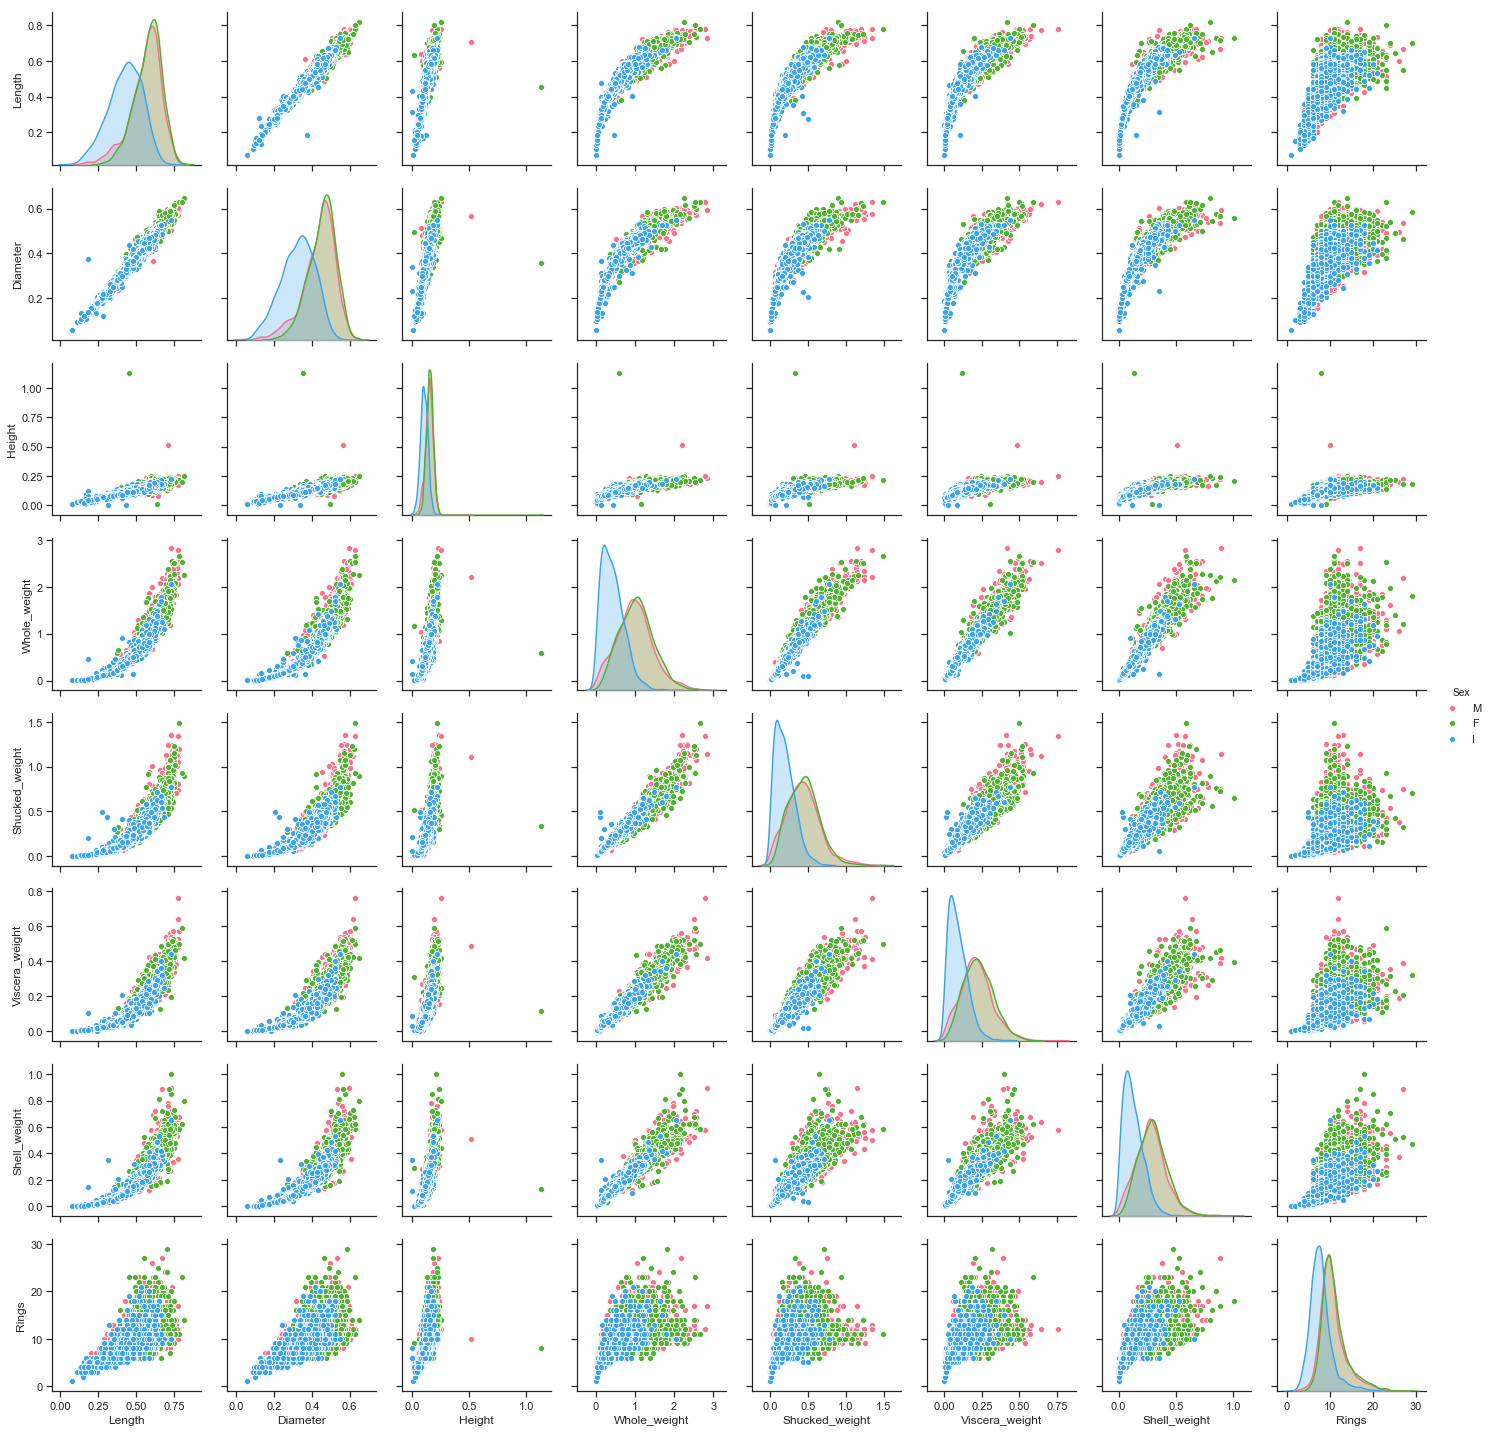

In [12]:
sns.pairplot(data, vars = ['Length', 'Diameter', 'Height', 'Whole_weight', 'Shucked_weight',
                           'Viscera_weight', 'Shell_weight', 'Rings'] ,hue='Sex', palette='husl')
plt.show()

In [14]:
g_m=data[data['Sex']=='M']
g_m.describe()

,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,Rings
count,1528.000000,1528.000000,1528.000000,1528.000000,1528.000000,1528.000000,1528.000000,1528.000000
mean,0.561391,0.439287,0.151381,0.991459,0.432946,0.215545,0.281969,10.705497
std,0.102697,0.084398,0.034804,0.470581,0.223000,0.104919,0.130834,3.026349
min,0.155000,0.110000,0.025000,0.015500,0.006500,0.003000,0.005000,3.000000
25%,0.505000,0.395000,0.130000,0.671625,0.276375,0.145875,0.190000,9.000000
50%,0.580000,0.455000,0.155000,0.975750,0.421750,0.210000,0.276000,10.000000
75%,0.630000,0.500000,0.175000,1.265625,0.566000,0.278000,0.355500,12.000000
max,0.780000,0.630000,0.515000,2.825500,1.351000,0.760000,0.897000,27.000000


In [15]:
g_f=data[data['Sex']=='F']
g_f.describe()

,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,Rings
count,1307.000000,1307.000000,1307.000000,1307.000000,1307.000000,1307.000000,1307.000000,1307.000000
mean,0.579093,0.454732,0.158011,1.046532,0.446188,0.230689,0.302010,11.129304
std,0.086160,0.070954,0.039984,0.430316,0.198663,0.097617,0.125649,3.104256
min,0.275000,0.195000,0.015000,0.080000,0.031000,0.021000,0.025000,5.000000
25%,0.525000,0.410000,0.140000,0.730000,0.295000,0.159000,0.213250,9.000000
50%,0.590000,0.465000,0.160000,1.038500,0.440500,0.224000,0.295000,10.000000
75%,0.640000,0.505000,0.175000,1.320250,0.573250,0.297250,0.375000,12.000000
max,0.815000,0.650000,1.130000,2.657000,1.488000,0.590000,1.005000,29.000000


In [16]:
g_i=data[data['Sex']=='I']
g_i.describe()

,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,Rings
count,1342.000000,1342.000000,1342.000000,1342.000000,1342.000000,1342.000000,1342.000000,1342.000000
mean,0.427746,0.326494,0.107996,0.431363,0.191035,0.092010,0.128182,7.890462
std,0.108858,0.088109,0.031995,0.286275,0.128405,0.062536,0.084927,2.511554
min,0.075000,0.055000,0.000000,0.002000,0.001000,0.000500,0.001500,1.000000
25%,0.360000,0.270000,0.085000,0.205500,0.090000,0.042500,0.064125,6.000000
50%,0.435000,0.335000,0.110000,0.384000,0.169750,0.080500,0.113000,8.000000
75%,0.510000,0.390000,0.130000,0.599375,0.270375,0.130000,0.178500,9.000000
max,0.725000,0.550000,0.220000,2.049500,0.773500,0.440500,0.655000,21.000000


In [18]:
dataz=data1.apply(zscore)
dataz.head()

,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,Rings
0,-0.574558,-0.432149,-1.064424,-0.641898,-0.607685,-0.726212,-0.638217,1.571544
1,-1.448986,-1.439929,-1.183978,-1.230277,-1.170910,-1.205221,-1.212987,-0.910013
2,0.050033,0.122130,-0.107991,-0.309469,-0.463500,-0.356690,-0.207139,-0.289624
3,-0.699476,-0.432149,-0.347099,-0.637819,-0.648238,-0.607600,-0.602294,0.020571
4,-1.615544,-1.540707,-1.423087,-1.272086,-1.215968,-1.287337,-1.320757,-0.910013


In [19]:
cluster_range=range(1,15)
cluster_error=[]
for num_cluster in cluster_range:
    model=KMeans(num_cluster)
    model.fit(dataz)
    cluster_error.append(model.inertia_)

In [20]:
labels=model.labels_
centroids=model.cluster_centers_

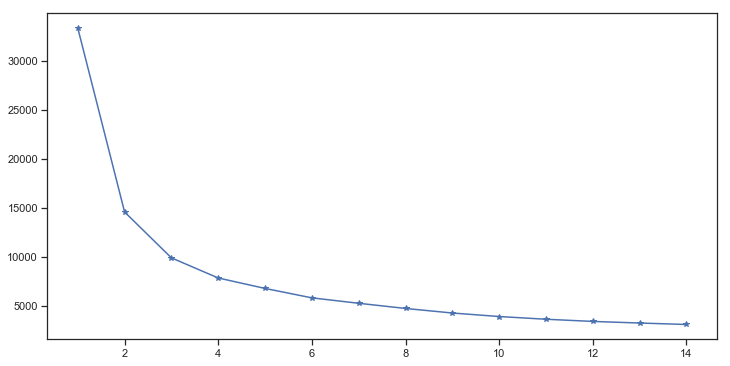

In [21]:
plt.figure(figsize=(12,6))
plt.plot(cluster_range,cluster_error,marker='*')

In [22]:
kmeans=KMeans(n_clusters=3,n_init=15,random_state=2)

In [23]:
kmeans.fit(dataz)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=15, n_jobs=None, precompute_distances='auto',
       random_state=2, tol=0.0001, verbose=0)

In [24]:
centroids=kmeans.cluster_centers_
centroids

array([[ 0.13570472,  0.13223651,  0.06955548, -0.08492905, -0.09047204,
        -0.0829803 , -0.06004439,  0.14255146],
       [-1.27709975, -1.27787282, -1.12085776, -1.13750326, -1.08408354,
        -1.11591049, -1.1283335 , -0.85717476],
       [ 1.03608988,  1.04187408,  0.98130211,  1.22176997,  1.17823769,
         1.19808871,  1.17676949,  0.62065252]])

Text(0.5, 0.92, '3D plot of kmeans Clustering')

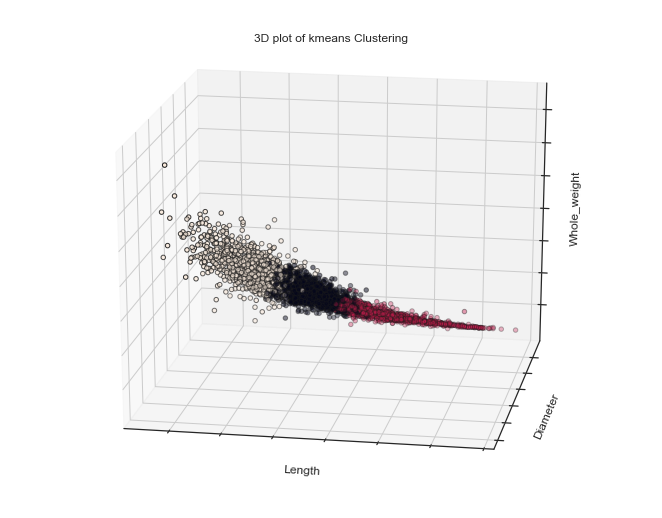

In [31]:
fig=plt.figure(figsize=(9,7))
ax=Axes3D(fig,rect=[0,0,1,1],elev=20,azim=100)
kmeans.fit(dataz)
labels=kmeans.labels_
ax.scatter(dataz.iloc[:,0],dataz.iloc[:,3],dataz.iloc[:,5],
          c=labels.astype(np.float),edgecolor='K')
ax.w_xaxis.set_ticklabels([])
ax.w_yaxis.set_ticklabels([])
ax.w_zaxis.set_ticklabels([])
ax.set_xlabel('Length')
ax.set_ylabel('Diameter')
ax.set_zlabel('Whole_weight')
ax.set_title('3D plot of kmeans Clustering')

In [28]:
kmeans.inertia_

9922.858144328871

In [32]:
model2 = AgglomerativeClustering(n_clusters=3, affinity='euclidean',  linkage='ward')

In [34]:
dataz.head()

,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,Rings
0,-0.574558,-0.432149,-1.064424,-0.641898,-0.607685,-0.726212,-0.638217,1.571544
1,-1.448986,-1.439929,-1.183978,-1.230277,-1.170910,-1.205221,-1.212987,-0.910013
2,0.050033,0.122130,-0.107991,-0.309469,-0.463500,-0.356690,-0.207139,-0.289624
3,-0.699476,-0.432149,-0.347099,-0.637819,-0.648238,-0.607600,-0.602294,0.020571
4,-1.615544,-1.540707,-1.423087,-1.272086,-1.215968,-1.287337,-1.320757,-0.910013


In [35]:
model2.fit(dataz)

AgglomerativeClustering(affinity='euclidean', compute_full_tree='auto',
                        connectivity=None, distance_threshold=None,
                        linkage='ward', memory=None, n_clusters=3,
                        pooling_func='deprecated')

In [36]:
L=pd.DataFrame(model2.labels_)
L[0].value_counts()

1    1993
0    1407
2     777
Name: 0, dtype: int64

Text(0.5, 0.92, '3D plot of kmeans Clustering')

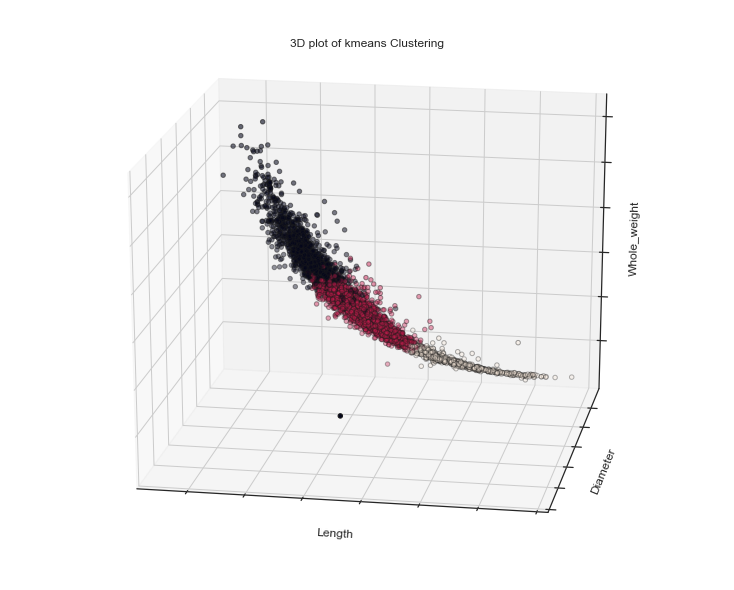

In [38]:
#Results of AGC
#3D Scatter Plot
fig = plt.figure(figsize=(10, 8))
ax = Axes3D(fig, rect=[0, 0, 1, 1], elev=20, azim=100)
#kmeans.fit(df_scaled)
L = model2.labels_
ax.scatter(dataz.iloc[:, 0], dataz.iloc[:, 2], dataz.iloc[:, 3],
           c=L.astype(np.float), edgecolor='k')
ax.w_xaxis.set_ticklabels([])
ax.w_yaxis.set_ticklabels([])
ax.w_zaxis.set_ticklabels([])
ax.set_xlabel('Length')
ax.set_ylabel('Diameter')
ax.set_zlabel('Whole_weight')
ax.set_title('3D plot of kmeans Clustering')

In [39]:
## creating a new dataframe only for labels and converting it into categorical variable
AGC_labels = pd.DataFrame(model2.labels_ , columns = list(['labels']))

AGC_labels['labels'] = AGC_labels['labels'].astype('category')

In [41]:
abalone_AGC_labeled = dataz.join(AGC_labels)

In [44]:
abalone_AGC_labeled.head()

,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,Rings,labels
0,-0.574558,-0.432149,-1.064424,-0.641898,-0.607685,-0.726212,-0.638217,1.571544,1
1,-1.448986,-1.439929,-1.183978,-1.230277,-1.170910,-1.205221,-1.212987,-0.910013,2
2,0.050033,0.122130,-0.107991,-0.309469,-0.463500,-0.356690,-0.207139,-0.289624,1
3,-0.699476,-0.432149,-0.347099,-0.637819,-0.648238,-0.607600,-0.602294,0.020571,1
4,-1.615544,-1.540707,-1.423087,-1.272086,-1.215968,-1.287337,-1.320757,-0.910013,2


In [43]:
AGC_clusters = abalone_AGC_labeled.groupby(['labels'])
#wine_clusters = wine_data_attr.groupby(['clusters'])
Df0=AGC_clusters.get_group(0)
Df1=AGC_clusters.get_group(1)
Df2=AGC_clusters.get_group(2)

In [45]:
(Df0.shape,Df1.shape,Df2.shape)

((1407, 9), (1993, 9), (777, 9))

In [46]:
c0=kmeans.cluster_centers_[0,:]
c1=kmeans.cluster_centers_[1,:]
c2=kmeans.cluster_centers_[2,:]

In [47]:
c0

array([ 0.13570472,  0.13223651,  0.06955548, -0.08492905, -0.09047204,
       -0.0829803 , -0.06004439,  0.14255146])

In [48]:
c1

array([-1.27709975, -1.27787282, -1.12085776, -1.13750326, -1.08408354,
       -1.11591049, -1.1283335 , -0.85717476])

In [49]:
c2

array([1.03608988, 1.04187408, 0.98130211, 1.22176997, 1.17823769,
       1.19808871, 1.17676949, 0.62065252])

In [51]:
AGC_I0=0
AGC_I1=0
AGC_I2=0
for i in np.arange(Df0.shape[0]):
  AGC_I0=AGC_I0+np.sum((Df0.iloc[i,:-1]-c0)**2)
for i in np.arange(Df1.shape[0]):  
  AGC_I1=AGC_I1+np.sum((Df1.iloc[i,:-1]-c1)**2)
for i in np.arange(Df2.shape[0]):
  AGC_I2=AGC_I2+np.sum((Df2.iloc[i,:-1]-c2)**2)

In [52]:
AGC_I0,AGC_I1,AGC_I2

(16586.2320181777, 18932.707222996854, 37093.8723054704)

In [53]:
AGC_I0+AGC_I1+AGC_I2

72612.81154664495

In [54]:
dataz.head()

,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,Rings
0,-0.574558,-0.432149,-1.064424,-0.641898,-0.607685,-0.726212,-0.638217,1.571544
1,-1.448986,-1.439929,-1.183978,-1.230277,-1.170910,-1.205221,-1.212987,-0.910013
2,0.050033,0.122130,-0.107991,-0.309469,-0.463500,-0.356690,-0.207139,-0.289624
3,-0.699476,-0.432149,-0.347099,-0.637819,-0.648238,-0.607600,-0.602294,0.020571
4,-1.615544,-1.540707,-1.423087,-1.272086,-1.215968,-1.287337,-1.320757,-0.910013


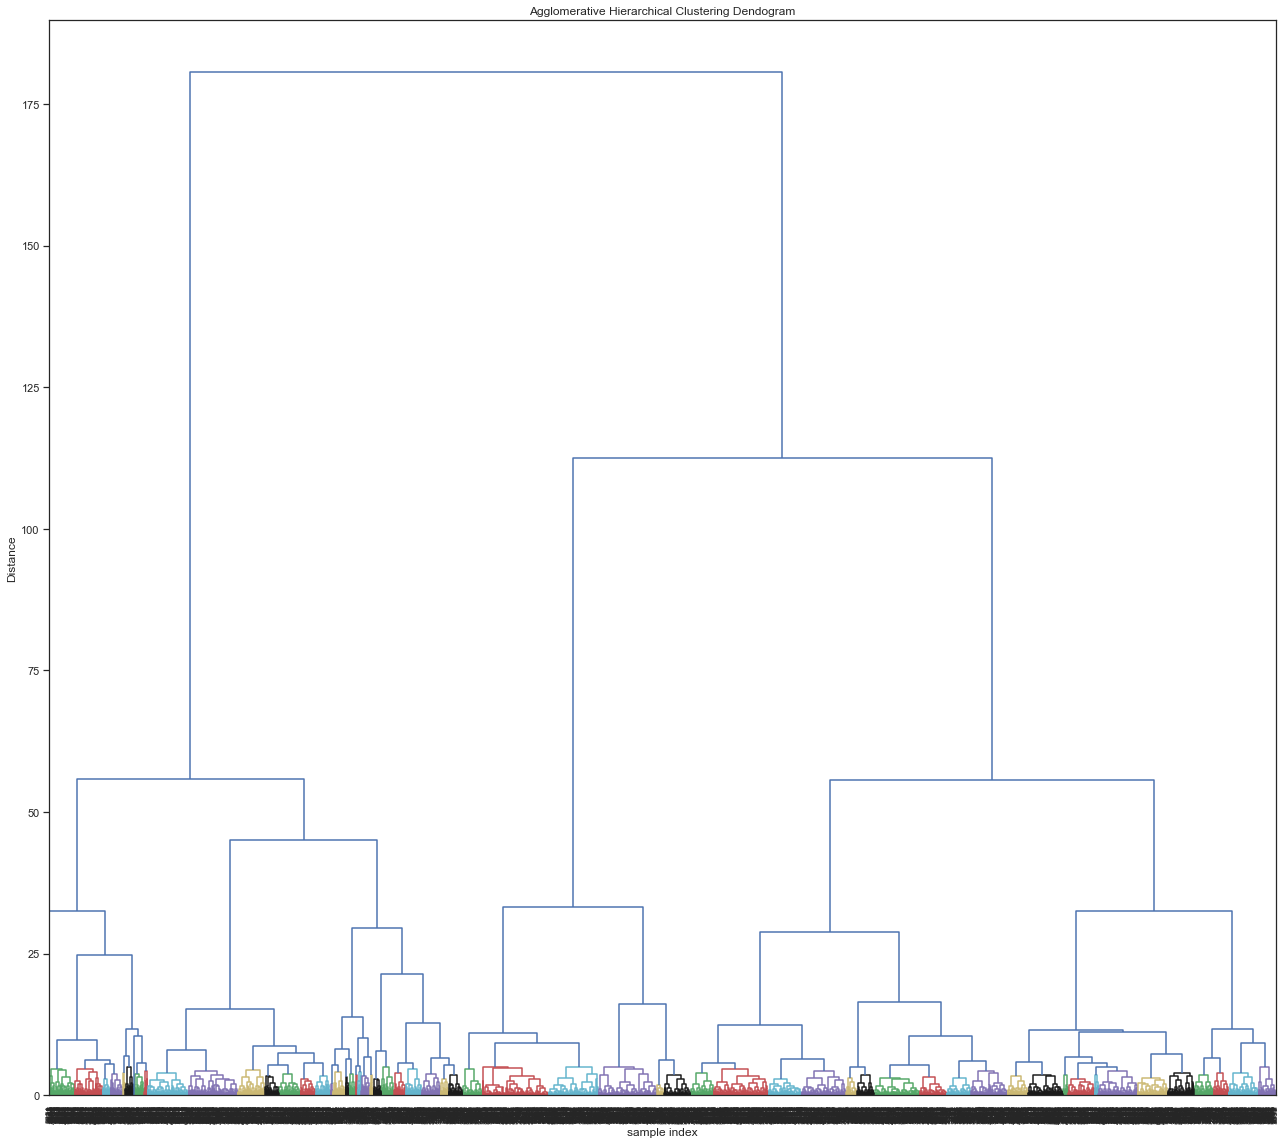

In [61]:
from scipy.cluster.hierarchy import dendrogram, linkage
plt.figure(figsize=(18, 16))
plt.title('Agglomerative Hierarchical Clustering Dendogram')
plt.xlabel('sample index')
plt.ylabel('Distance')
Z = linkage(dataz, 'ward')
dendrogram(Z,leaf_rotation=90.0,p=13,color_threshold=5,
           leaf_font_size=8)
plt.tight_layout()